> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

> In this project I will analyzing data associated with TMDb movie dataset. In particular, I will be interested in finding which movie genres are most popular over the years, what average runtime of the movies, and runtime most liked by the audiences according to movie popularity

> I selected and downloaded my data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
datamv = pd.read_csv('tmdb-movies.csv')
datamv.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
datamv.shape

(10866, 21)

In [4]:
datamv.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
datamv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

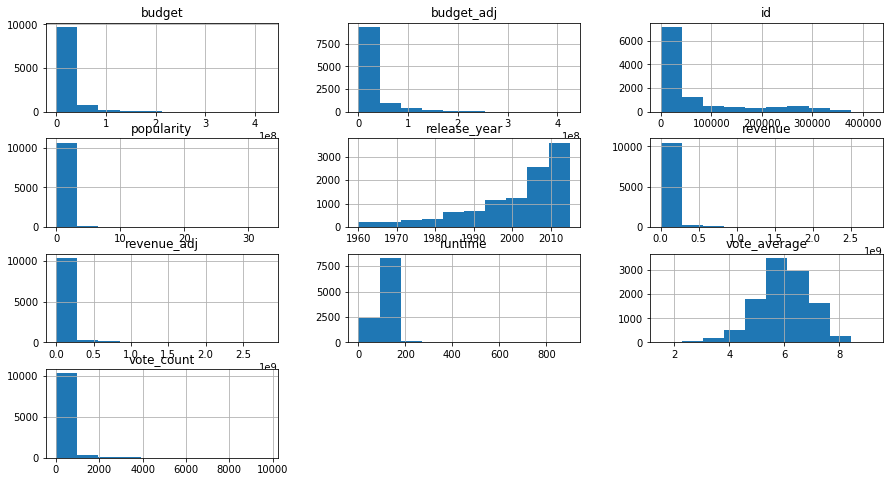

In [6]:
datamv.hist(figsize=(15, 8));

> Histograms of some data. as we can see, producing movies with less than 200 min runtime is high. vote average is between 4 and 8


### Data Cleaning 

In [7]:
datamv.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'production_companies'], axis=1, inplace=True)

> I I dropped columns, which some of them contain many null values 

In [8]:
datamv.head()

,popularity,budget,revenue,original_title,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
datamv['revenue'].mean()

39823319.793392234

> Handle the zero values of the revenue by replacing it to the mean value 

In [10]:
datamv['revenue'].replace(0 , datamv['revenue'].mean())

0        1.513529e+09
1        3.784364e+08
2        2.952382e+08
3        2.068178e+09
4        1.506249e+09
5        5.329505e+08
6        4.406035e+08
7        5.953803e+08
8        1.156731e+09
9        8.537086e+08
10       8.806746e+08
11       1.839877e+08
12       3.686941e+07
13       2.436371e+08
14       1.405036e+09
15       1.557601e+08
16       3.257714e+08
17       5.186022e+08
18       5.423514e+08
19       6.505234e+08
20       2.090357e+08
21       9.170983e+07
22       4.704908e+08
23       5.696515e+08
24       1.333465e+08
25       6.823301e+08
26       2.158636e+08
27       4.038021e+08
28       8.834647e+07
29       3.112569e+08
             ...     
10836    3.982332e+07
10837    3.982332e+07
10838    3.982332e+07
10839    3.982332e+07
10840    3.982332e+07
10841    3.982332e+07
10842    3.982332e+07
10843    3.982332e+07
10844    3.982332e+07
10845    3.982332e+07
10846    3.982332e+07
10847    3.982332e+07
10848    1.200000e+07
10849    3.982332e+07
10850    3

In [11]:
datamv['budget'].mean()

14625701.094146879

> Handle the zero values of the budget by replacing it to the mean value 

In [12]:
datamv['budget'].replace(0 , datamv['budget'].mean())

0        1.500000e+08
1        1.500000e+08
2        1.100000e+08
3        2.000000e+08
4        1.900000e+08
5        1.350000e+08
6        1.550000e+08
7        1.080000e+08
8        7.400000e+07
9        1.750000e+08
10       2.450000e+08
11       1.760000e+08
12       1.500000e+07
13       8.800000e+07
14       2.800000e+08
15       4.400000e+07
16       4.800000e+07
17       1.300000e+08
18       9.500000e+07
19       1.600000e+08
20       1.900000e+08
21       3.000000e+07
22       1.100000e+08
23       4.000000e+07
24       2.800000e+07
25       1.500000e+08
26       6.800000e+07
27       8.100000e+07
28       2.000000e+07
29       6.100000e+07
             ...     
10836    1.462570e+07
10837    1.462570e+07
10838    1.462570e+07
10839    1.462570e+07
10840    1.462570e+07
10841    7.500000e+04
10842    1.462570e+07
10843    1.462570e+07
10844    1.462570e+07
10845    1.462570e+07
10846    1.462570e+07
10847    1.462570e+07
10848    5.115000e+06
10849    1.462570e+07
10850    1

In [13]:
datamv['release_date'] = pd.to_datetime(datamv['release_date'])

> convert release_date from object to the date 

In [14]:
datamv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1:  Which genres are most popular from year to year?

> we will start with an analysis of which genres are popular to help directors to increase produce movies from those genres more than other

In [15]:
detail_gen = list(map(str,(datamv['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

#make the numpy array of year and popularity which contain all the rows of release_year and popularity column
year = np.array(datamv['release_year'])
popularity = np.array(datamv['popularity'])

#make a null dataframe which indexs are genres and columns are years
popularity_mv = pd.DataFrame(index = genre, columns = range(1960, 2016))

#change all the values of the dataframe from NAN to zero
popularity_mv = popularity_mv.fillna(value = 0.0)

z = 0
for i in detail_gen:
    split_genre = list(map(str,i.split('|')))
    popularity_mv.loc[split_genre, year[z]] = popularity_mv.loc[split_genre, year[z]] + popularity[z]
    z+=1
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_gen = calculate_std(popularity_mv)

In [16]:
popular_gen.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817532,1.534066,1.097634,...,0.608896,0.520337,0.755137,0.977663,1.027009,0.586530,0.732253,0.755530,1.174435,1.614759
Science Fiction,-0.467064,-0.361952,-0.640003,-0.646572,-0.667888,-0.869288,0.097082,-0.634089,1.452081,-0.710447,...,-0.285369,-0.305635,0.082456,0.679288,-0.091894,0.212188,0.189865,0.575138,0.902119,1.231957
Fantasy,-0.528631,-0.744050,-0.691929,-0.895883,-0.012691,-0.992961,-0.585750,-0.706100,-0.055098,-0.771756,...,0.064256,0.322410,0.008741,0.178378,0.149189,0.028812,0.081027,-0.182739,-0.108344,-0.320493
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.517043,0.209143,0.593035,...,0.085715,0.302191,0.298300,-0.395319,-0.158512,-0.059809,0.092316,0.347388,-0.219402,0.027262
Western,0.705451,-0.588007,-0.266409,-0.863575,-1.009777,-0.527569,-0.028313,-0.775331,-0.824684,0.996730,...,-1.032584,-1.024569,-1.058297,-1.111565,-0.974396,-0.992158,-0.868553,-0.974491,-0.925887,-0.759302


Text(0,0.5,'Genres')

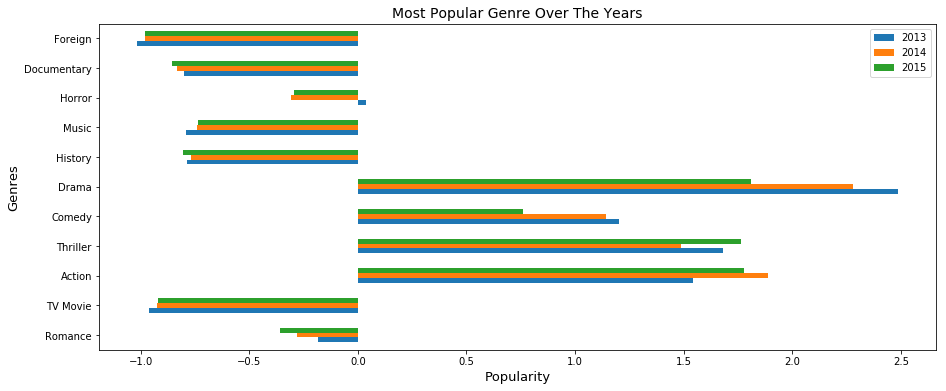

In [17]:
popular_gen.iloc[10:,53:].plot(kind='barh',figsize = (15,6))

plt.title("Most Popular Genre Over The Years", fontsize = 14)

plt.xlabel("Popularity", fontsize = 13)
plt.ylabel("Genres", fontsize = 13)

> as you can see, people like drama genre in the movies and prefer to watch it then action genre

### Question 2: Average runtime of movies over the years?

> the runtime of movies is important for the audiences to know how much time they will spend to watch it. so we will analyze runtime and how it changes over the years

Text(0,0.5,'Runtime')

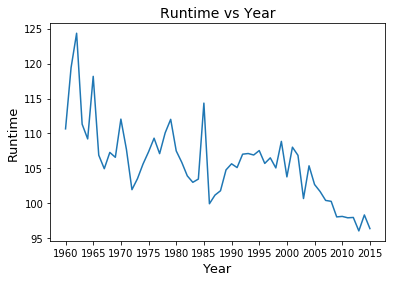

In [18]:
#make the group of the data according to their release_year and find the mean  related to this and plot
datamv.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setup the title of the figure
plt.title("Runtime vs Year",fontsize = 14)

#setup the x-label and y-label of the plot
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)

 > As we can see the runtime was decreased over the years

### Question 3: Runtime most liked by the audiences according to movie popularity?

> runtime is an important factor especially when audiences are interested in that movie here we can analyze the relationship between the runtime and popularity

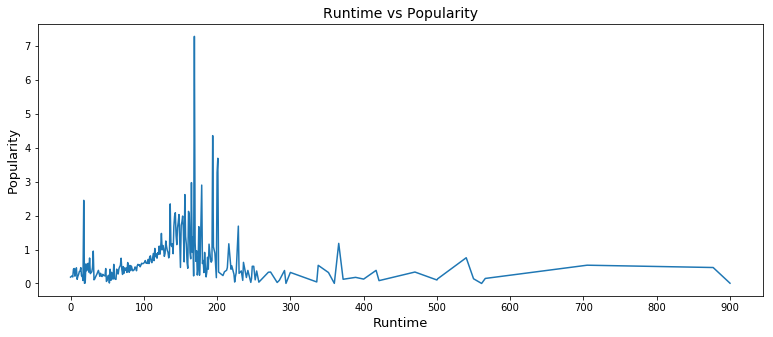

In [19]:
#make the group of the data according to their runtime and find the mean popularity related to this and plot
datamv.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Popularity',fontsize = 13)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

>as shown in the figure the audiences prefer 100-200 min runtime for a popular movie and as runtime increased the popularity of the movie is decreased   

<a id='conclusions'></a>
## Conclusions

> Conclusion according to the first graph, we can see drama is the most popular genre, following by action, comedy, and thriller. In the third graph, short duration movies are more popular than long duration movies. As a result, the runtime of the movies are decreasing year by year as you see in the second graph. On the other hand, I faced some challenges: the dataset was large, I could not handle it well. Question one took more time for me in the analysis. 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0